In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('k-means.csv', header = None, sep = '\t')

In [3]:
df

,0,1
0,"1,84207953112616","4,60757160448228"
1,"5,65858312061882","4,79996405444154"
2,"6,35257892020234","3,29085449875427"
3,"2,90401652528136","4,61220411281507"
4,"3,23197915720744","4,93989405282630"
...,...,...
295,"7,30278708280303","3,38015978852108"
296,"6,99198434061175","2,98706728722547"
297,"4,82553409551138","2,77961663918051"
298,"6,11768055015372","2,85475655216480"


In [4]:
df.dtypes

0    object
1    object
dtype: object

In [5]:
def toFloat(col):
    col = col.replace(',', '.')
    return float(col)

df.columns = ['x1', 'x2']


df['x1'] = df['x1'].astype(str).apply(toFloat)
df['x2'] = df['x2'].astype(str).apply(toFloat)

In [6]:
df

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


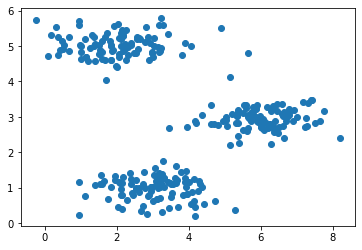

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['x1'], df['x2'])
plt.show()

In [8]:
def initialize_centroids(df, k):
    centroids = df.sample(n=k).to_numpy()
    return centroids

def assign_clusters(df, centroids):
    distances = np.sqrt(((df.to_numpy() - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(df, clusters, k):
    new_centroids = np.array([df[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(df, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(df, k)
    for _ in range(max_iters):
        clusters = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, clusters, k)
        
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
        
    inertia = np.sum((df.to_numpy() - centroids[clusters])**2)
    return clusters, centroids, inertia

def compute_inertia(df, max_k):
    inertia_values = []
    for k in range(1, max_k + 1):
        _, _, inertia = kmeans(df[['x1', 'x2']], k)
        inertia_values.append(inertia)
    return inertia_values

In [9]:
k = 3
max_iters = 30
tol = 1e-4

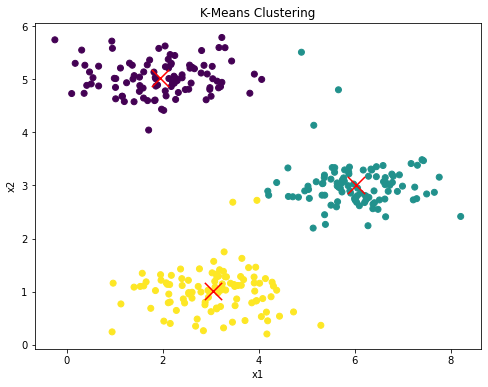

In [10]:
clusters, centroids, _ = kmeans(df[['x1', 'x2']], k, max_iters, tol)
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering')
plt.show()

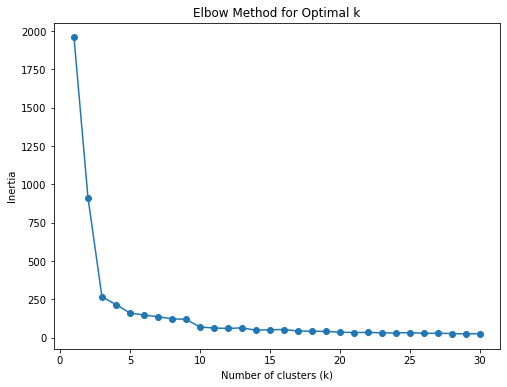

In [11]:
# Elbow method
max_k = 30
inertia_values = compute_inertia(df[['x1', 'x2']], max_k)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()